In [2]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from tqdm import tqdm

In [3]:
df = pd.read_parquet('../data/pivot_data_hourly.parquet',
                     engine="pyarrow",
                     dtype_backend="pyarrow")


In [4]:
df.head()


MeasurementName,SSA 3 Lysimeter UMP 120cm %,SSA 3 Lysimeter UMP 30cm %,SSA 3 Lysimeter UMP 75cm %,SSA 3 Lysimeter battery V,SSA 3 Lysimeter ec 120cm mS/cm,SSA 3 Lysimeter ec 30cm mS/cm,SSA 3 Lysimeter ec 75cm mS/cm,SSA 3 Lysimeter scale (1) kg,SSA 3 Lysimeter temperature 120cm degC,SSA 3 Lysimeter temperature 30cm degC,...,Weather Station UMP (1) temperature degC,Weather Station air pressure hPa,Weather Station air temperature degC,Weather Station battery V,Weather Station humidity %,Weather Station precipitation mm,Weather Station radiation W/qm,Weather Station temperature (5+) degC,Weather Station wind direction deg,Weather Station wind speed m/s
MeasureDate,,,,,,,,,,,,,,,,,,,,,
2013-07-01 00:00:00,32.7,25.17,33.691999,12.706,0.106,0.126,0.132,2845.463965,16.708,18.398,...,18.758,1018.731994,7.496,12.906,89.694,0.0,-5.4,8.728,193.352,0.052
2013-07-01 01:00:00,32.68,25.16,33.695,12.685,0.11,0.12,0.13,2845.454956,16.675,18.32,...,18.653334,1018.82666,7.093333,12.87,91.213333,0.0,-5.07,8.453333,211.603336,0.253333
2013-07-01 02:00:00,32.625,25.165,33.732499,12.67,0.1075,0.1175,0.135,2845.447449,16.665,18.2,...,18.53,1018.590011,7.5175,12.8525,90.597499,0.0,-4.9025,8.315,300.357506,0.4475
2013-07-01 03:00:00,32.625,25.067501,33.779999,12.655,0.105,0.13,0.135,2845.439941,16.64,18.045,...,18.372,1018.61001,7.048,12.84,93.504001,0.0,-2.964,8.216,45.595999,0.006
2013-07-01 04:00:00,32.633334,25.030001,33.779999,12.66,0.11,0.13,0.14,2845.423258,16.593334,17.906667,...,18.213333,1018.843343,8.376667,12.83,93.353332,0.0,17.58,9.643333,49.363333,0.096667


In [5]:
# Check column names and data types
print(df.info())

# Optional: get a summary
print(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
Index: 100849 entries, 2013-07-01 00:00:00 to 2025-01-01 00:00:00
Data columns (total 75 columns):
 #   Column                                       Non-Null Count  Dtype          
---  ------                                       --------------  -----          
 0   SSA 3 Lysimeter UMP 120cm %                  85557 non-null  double[pyarrow]
 1   SSA 3 Lysimeter UMP 30cm %                   85750 non-null  double[pyarrow]
 2   SSA 3 Lysimeter UMP 75cm %                   85557 non-null  double[pyarrow]
 3   SSA 3 Lysimeter battery V                    85557 non-null  double[pyarrow]
 4   SSA 3 Lysimeter ec 120cm mS/cm               85557 non-null  double[pyarrow]
 5   SSA 3 Lysimeter ec 30cm mS/cm                85557 non-null  double[pyarrow]
 6   SSA 3 Lysimeter ec 75cm mS/cm                85557 non-null  double[pyarrow]
 7   SSA 3 Lysimeter scale (1) kg                 85557 non-null  double[pyarrow]
 8   SSA 3 Lysimeter temperature 120cm degC

In [6]:
df.isna().sum()

MeasurementName
SSA 3 Lysimeter UMP 120cm %              15292
SSA 3 Lysimeter UMP 30cm %               15099
SSA 3 Lysimeter UMP 75cm %               15292
SSA 3 Lysimeter battery V                15292
SSA 3 Lysimeter ec 120cm mS/cm           15292
                                         ...  
Weather Station precipitation mm          8831
Weather Station radiation W/qm            8831
Weather Station temperature (5+) degC     8831
Weather Station wind direction deg        8831
Weather Station wind speed m/s            8831
Length: 75, dtype: int64

In [7]:
print(df.info())
print(df.describe(include="all"))


<class 'pandas.core.frame.DataFrame'>
Index: 100849 entries, 2013-07-01 00:00:00 to 2025-01-01 00:00:00
Data columns (total 75 columns):
 #   Column                                       Non-Null Count  Dtype          
---  ------                                       --------------  -----          
 0   SSA 3 Lysimeter UMP 120cm %                  85557 non-null  double[pyarrow]
 1   SSA 3 Lysimeter UMP 30cm %                   85750 non-null  double[pyarrow]
 2   SSA 3 Lysimeter UMP 75cm %                   85557 non-null  double[pyarrow]
 3   SSA 3 Lysimeter battery V                    85557 non-null  double[pyarrow]
 4   SSA 3 Lysimeter ec 120cm mS/cm               85557 non-null  double[pyarrow]
 5   SSA 3 Lysimeter ec 30cm mS/cm                85557 non-null  double[pyarrow]
 6   SSA 3 Lysimeter ec 75cm mS/cm                85557 non-null  double[pyarrow]
 7   SSA 3 Lysimeter scale (1) kg                 85557 non-null  double[pyarrow]
 8   SSA 3 Lysimeter temperature 120cm degC

In [8]:
df_clean = df.fillna(df.mean())
print("After dropping missing values:")
print(df_clean.info())

After dropping missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 100849 entries, 2013-07-01 00:00:00 to 2025-01-01 00:00:00
Data columns (total 75 columns):
 #   Column                                       Non-Null Count   Dtype          
---  ------                                       --------------   -----          
 0   SSA 3 Lysimeter UMP 120cm %                  100849 non-null  double[pyarrow]
 1   SSA 3 Lysimeter UMP 30cm %                   100849 non-null  double[pyarrow]
 2   SSA 3 Lysimeter UMP 75cm %                   100849 non-null  double[pyarrow]
 3   SSA 3 Lysimeter battery V                    100849 non-null  double[pyarrow]
 4   SSA 3 Lysimeter ec 120cm mS/cm               100849 non-null  double[pyarrow]
 5   SSA 3 Lysimeter ec 30cm mS/cm                100849 non-null  double[pyarrow]
 6   SSA 3 Lysimeter ec 75cm mS/cm                100849 non-null  double[pyarrow]
 7   SSA 3 Lysimeter scale (1) kg                 100849 non-null  double[pyarrow]
 8

In [9]:
# Create previous hour readings as features
X = df_clean.shift(1).iloc[1:]  # previous readings
Y = df_clean.iloc[1:]            # current readings

print(X.shape, Y.shape)


(100848, 75) (100848, 75)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
print(X_train.shape, X_test.shape)


(80678, 75) (20170, 75)


In [11]:
# Convert all columns to float64
X_train = X_train.astype('float64')
X_test  = X_test.astype('float64')
Y_train = Y_train.astype('float64')
Y_test  = Y_test.astype('float64')

X_train.columns = X_train.columns.str.replace(' ', '_')
X_test.columns  = X_test.columns.str.replace(' ', '_')

In [12]:
import pandas as pd

# Skontrolovať X
print("Missing values in X_train:")
print(X_train.isna().sum()[X_train.isna().sum() > 0])

print("\nMissing values in X_test:")
print(X_test.isna().sum()[X_test.isna().sum() > 0])

# Skontrolovať Y
print("\nMissing values in Y_train:")
print(Y_train.isna().sum()[Y_train.isna().sum() > 0])

print("\nMissing values in Y_test:")
print(Y_test.isna().sum()[Y_test.isna().sum() > 0])


Missing values in X_train:
Series([], dtype: int64)

Missing values in X_test:
Series([], dtype: int64)

Missing values in Y_train:
Series([], dtype: int64)

Missing values in Y_test:
Series([], dtype: int64)


In [13]:
low_variance_cols = Y_train.columns[Y_train.nunique() <= 1]
print("Columns with 0 or 1 unique value:", list(low_variance_cols))


Columns with 0 or 1 unique value: []


In [14]:
# Variance of each column in Y_train
variances = Y_train.var()

# Print all columns with their variance
for col, var in variances.items():
    print(f"{col}: {var:.6f}")

variances_sorted = variances.sort_values()
print(variances_sorted)


SSA 3 Lysimeter UMP 120cm %: 26.935247
SSA 3 Lysimeter UMP 30cm %: 66.853877
SSA 3 Lysimeter UMP 75cm %: 37.316140
SSA 3 Lysimeter battery V: 1.003982
SSA 3 Lysimeter ec 120cm mS/cm: 0.000451
SSA 3 Lysimeter ec 30cm mS/cm: 0.000825
SSA 3 Lysimeter ec 75cm mS/cm: 0.000646
SSA 3 Lysimeter scale (1) kg: 6033.619845
SSA 3 Lysimeter temperature 120cm degC: 39.398483
SSA 3 Lysimeter temperature 30cm degC: 61.811807
SSA 3 Lysimeter temperature 75cm degC: 48.063858
SSA 3 Lysimeter tension 120cm kPa: 202.569729
SSA 3 Lysimeter tension 30cm kPa: 52.748372
SSA 3 Lysimeter tension 75cm kPa: 266.749537
SSA 3 Lysimeter vacuum 120cm kPa: 303.708999
SSA 3 Lysimeter vacuum 30cm kPa: 65.451301
SSA 3 Lysimeter vacuum 75cm kPa: 370.104152
SSA 4 Schacht UMP (1) 120cm %: 121.747788
SSA 4 Schacht UMP (1) 30cm %: 66.958335
SSA 4 Schacht UMP (1) 75cm %: 87.019644
SSA 4 Schacht UMP (2) 120cm %: 128.309195
SSA 4 Schacht UMP (2) 30cm %: 65.773059
SSA 4 Schacht UMP (2) 75cm %: 94.298547
SSA 4 Schacht UMP (3) 120cm

In [15]:
'''
from sklearn.preprocessing import StandardScaler


scaler_X = StandardScaler()
scaler_Y = StandardScaler()


X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled  = scaler_X.transform(X_test)

Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled  = scaler_Y.transform(Y_test)
'''


'\nfrom sklearn.preprocessing import StandardScaler\n\n\nscaler_X = StandardScaler()\nscaler_Y = StandardScaler()\n\n\nX_train_scaled = scaler_X.fit_transform(X_train)\nX_test_scaled  = scaler_X.transform(X_test)\n\nY_train_scaled = scaler_Y.fit_transform(Y_train)\nY_test_scaled  = scaler_Y.transform(Y_test)\n'

In [16]:
'''import numpy as np
for i, col in enumerate(Y_train.columns):
    print(col, np.var(Y_train_scaled[:, i]))
    '''


'import numpy as np\nfor i, col in enumerate(Y_train.columns):\n    print(col, np.var(Y_train_scaled[:, i]))\n    '

In [17]:
print(Y_train.var())


MeasurementName
SSA 3 Lysimeter UMP 120cm %                 26.935247
SSA 3 Lysimeter UMP 30cm %                  66.853877
SSA 3 Lysimeter UMP 75cm %                  37.316140
SSA 3 Lysimeter battery V                    1.003982
SSA 3 Lysimeter ec 120cm mS/cm               0.000451
                                             ...     
Weather Station precipitation mm             0.015623
Weather Station radiation W/qm           52165.745271
Weather Station temperature (5+) degC       89.562520
Weather Station wind direction deg       10005.669908
Weather Station wind speed m/s               2.447131
Length: 75, dtype: float64


In [18]:
X_train.var().sort_values()


MeasurementName
SSA_4_Schacht_discharge_(3)_l           2.564922e-07
SSA_4_Schacht_discharge_(2)_l           3.436459e-05
URB_Lysimeter_discharge_(1)_l           4.754290e-05
SSA_4_Schacht_discharge_(1)_l           1.169762e-04
SSA_3_Lysimeter_ec_120cm_mS/cm          4.514255e-04
                                            ...     
URB_Lysimeter_temperature_control_mV    1.147210e+03
URB_Lysimeter_percolation_pump_mV       1.360200e+03
SSA_3_Lysimeter_scale_(1)_kg            6.033422e+03
Weather_Station_wind_direction_deg      1.000564e+04
Weather_Station_radiation_W/qm          5.216496e+04
Length: 75, dtype: float64

In [19]:


models = {}

# Training loop
for i, col in enumerate(tqdm(Y_train.columns, desc="Training models")):
    var = Y_train[col].var()
    if var <= 100:
        params = {'n_estimators': 100, 'learning_rate': 0.02, 'max_depth': 7, "num_leaves": 31, 'min_child_samples': 20}
    elif var >= 100 and var < 500:
        params = {'n_estimators': 175, 'learning_rate': 0.03, 'max_depth': 12, "num_leaves": 63, 'min_child_samples': 15}
    else:
        params = {'n_estimators': 500, 'learning_rate': 0.05, 'max_depth': 25, "num_leaves": 127, 'min_child_samples': 10}
    model = LGBMRegressor(
        n_estimators=params['n_estimators'],
        learning_rate=params['learning_rate'],
        max_depth=params['max_depth'],
        n_jobs=-1,
        force_col_wise=True,
        num_leaves=params["num_leaves"],
        min_child_samples=params['min_child_samples'],
        
    )
    
    model.fit(
        X_train,
        Y_train[col].values,
        eval_set=[(X_test, Y_test[col].values)],
        eval_metric='rmse',
    )
    
    models[col] = model


Training models:   0%|          | 0/75 [00:00<?, ?it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 30.049187


Training models:   1%|▏         | 1/75 [00:00<01:02,  1.18it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 33.519998


Training models:   3%|▎         | 2/75 [00:01<01:03,  1.14it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 28.817528


Training models:   4%|▍         | 3/75 [00:02<01:00,  1.18it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 12.623185


Training models:   5%|▌         | 4/75 [00:03<00:56,  1.27it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 0.073037


Training models:   7%|▋         | 5/75 [00:04<00:57,  1.21it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 0.130068


Training models:   8%|▊         | 6/75 [00:04<00:52,  1.31it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 0.085599


Training models:   9%|▉         | 7/75 [00:05<00:50,  1.36it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 2880.471515


Training models:  11%|█         | 8/75 [00:09<01:56,  1.75s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 10.313379


Training models:  12%|█▏        | 9/75 [00:10<01:34,  1.43s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 11.566476


Training models:  13%|█▎        | 10/75 [00:10<01:19,  1.22s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 11.430931


Training models:  15%|█▍        | 11/75 [00:11<01:10,  1.10s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 12.335456


Training models:  16%|█▌        | 12/75 [00:13<01:14,  1.19s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 2.208689


Training models:  17%|█▋        | 13/75 [00:13<01:01,  1.00it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 13.149363


Training models:  19%|█▊        | 14/75 [00:14<01:07,  1.10s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 13.203771


Training models:  20%|██        | 15/75 [00:16<01:08,  1.15s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 5.157097


Training models:  21%|██▏       | 16/75 [00:16<00:57,  1.03it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 16.676255


Training models:  23%|██▎       | 17/75 [00:18<01:04,  1.11s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 35.876592


Training models:  24%|██▍       | 18/75 [00:19<01:09,  1.21s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 34.163615


Training models:  25%|██▌       | 19/75 [00:20<00:59,  1.07s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 34.020590


Training models:  27%|██▋       | 20/75 [00:21<00:54,  1.01it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 33.538612


Training models:  28%|██▊       | 21/75 [00:22<01:01,  1.15s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 37.033612


Training models:  29%|██▉       | 22/75 [00:23<00:53,  1.01s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 31.192088


Training models:  31%|███       | 23/75 [00:24<00:46,  1.11it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 34.688195


Training models:  32%|███▏      | 24/75 [00:25<00:49,  1.03it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 35.487702


Training models:  33%|███▎      | 25/75 [00:26<00:52,  1.06s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 30.714015


Training models:  35%|███▍      | 26/75 [00:27<00:46,  1.06it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 12.266984


Training models:  36%|███▌      | 27/75 [00:27<00:40,  1.20it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 0.001274


Training models:  37%|███▋      | 28/75 [00:28<00:33,  1.39it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 0.000062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

Training models:  39%|███▊      | 29/75 [00:28<00:28,  1.63it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Training models:  40%|████      | 30/75 [00:28<00:25,  1.80it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 0.079626


Training models:  41%|████▏     | 31/75 [00:29<00:24,  1.78it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 0.060906


Training models:  43%|████▎     | 32/75 [00:30<00:24,  1.76it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 0.062637


Training models:  44%|████▍     | 33/75 [00:30<00:24,  1.71it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 0.066026


Training models:  45%|████▌     | 34/75 [00:31<00:24,  1.69it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 0.070594


Training models:  47%|████▋     | 35/75 [00:31<00:23,  1.68it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 0.018931


Training models:  48%|████▊     | 36/75 [00:32<00:22,  1.72it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 0.124225


Training models:  49%|████▉     | 37/75 [00:33<00:22,  1.69it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 0.014506


Training models:  51%|█████     | 38/75 [00:33<00:22,  1.67it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 0.031659


Training models:  52%|█████▏    | 39/75 [00:34<00:21,  1.65it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 7.025471


Training models:  53%|█████▎    | 40/75 [00:35<00:28,  1.23it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 9.786376


Training models:  55%|█████▍    | 41/75 [00:36<00:32,  1.03it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 9.980382


Training models:  56%|█████▌    | 42/75 [00:38<00:35,  1.07s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 10.780207


Training models:  57%|█████▋    | 43/75 [00:39<00:36,  1.15s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 9.187269


Training models:  59%|█████▊    | 44/75 [00:40<00:37,  1.20s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 10.596659


Training models:  60%|██████    | 45/75 [00:42<00:36,  1.23s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 9.645366


Training models:  61%|██████▏   | 46/75 [00:43<00:35,  1.21s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 9.904334


Training models:  63%|██████▎   | 47/75 [00:44<00:33,  1.20s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 10.047409


Training models:  64%|██████▍   | 48/75 [00:45<00:32,  1.19s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 14.328741


Training models:  65%|██████▌   | 49/75 [00:46<00:31,  1.20s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 5.529234


Training models:  67%|██████▋   | 50/75 [00:48<00:29,  1.17s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 17.836538


Training models:  68%|██████▊   | 51/75 [00:49<00:28,  1.17s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 15.967915


Training models:  69%|██████▉   | 52/75 [00:50<00:27,  1.20s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 0.000635


Training models:  71%|███████   | 53/75 [00:50<00:21,  1.02it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 12.989546


Training models:  72%|███████▏  | 54/75 [00:51<00:19,  1.05it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 9.556855


Training models:  73%|███████▎  | 55/75 [00:53<00:22,  1.10s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 37.718459


Training models:  75%|███████▍  | 56/75 [00:57<00:38,  2.04s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 81.118621


Training models:  76%|███████▌  | 57/75 [00:58<00:28,  1.61s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 13.239058


Training models:  77%|███████▋  | 58/75 [00:58<00:22,  1.35s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 24.186452


Training models:  79%|███████▊  | 59/75 [01:00<00:21,  1.32s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 16.151931


Training models:  80%|████████  | 60/75 [01:03<00:30,  2.06s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 106.969628


Training models:  81%|████████▏ | 61/75 [01:07<00:36,  2.58s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 119.884823


Training models:  83%|████████▎ | 62/75 [01:11<00:38,  2.94s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 21.676044


Training models:  84%|████████▍ | 63/75 [01:12<00:28,  2.41s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 31.234936


Training models:  85%|████████▌ | 64/75 [01:13<00:20,  1.88s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 0.119011


Training models:  87%|████████▋ | 65/75 [01:13<00:14,  1.49s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 10.199259


Training models:  88%|████████▊ | 66/75 [01:14<00:11,  1.24s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 1015.427725


Training models:  89%|████████▉ | 67/75 [01:15<00:08,  1.07s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 11.437804


Training models:  91%|█████████ | 68/75 [01:15<00:06,  1.05it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 13.260774


Training models:  92%|█████████▏| 69/75 [01:16<00:05,  1.18it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 76.949159


Training models:  93%|█████████▎| 70/75 [01:17<00:05,  1.00s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 0.014676


Training models:  95%|█████████▍| 71/75 [01:18<00:03,  1.19it/s]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 150.679084


Training models:  96%|█████████▌| 72/75 [01:22<00:05,  1.70s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 11.716571


Training models:  97%|█████████▋| 73/75 [01:22<00:02,  1.40s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 171.146824


Training models:  99%|█████████▊| 74/75 [01:26<00:02,  2.06s/it]

[LightGBM] [Info] Total Bins 17099
[LightGBM] [Info] Number of data points in the train set: 80678, number of used features: 75
[LightGBM] [Info] Start training from score 1.663131


Training models: 100%|██████████| 75/75 [01:26<00:00,  1.16s/it]


In [20]:
from sklearn.metrics import root_mean_squared_error
import numpy as np
import pandas as pd


Y_pred = np.column_stack([models[col].predict(X_test) for col in Y_train.columns])


Y_pred_df = pd.DataFrame(Y_pred, columns=Y_test.columns, index=Y_test.index)

# RMSE for every column
rmse_scores = {col: root_mean_squared_error(Y_test[col], Y_pred_df[col]) 
               for col in Y_test.columns}

# RMSE
for col, score in rmse_scores.items():
    print(f"{col}: RMSE = {score:.4f}")


SSA 3 Lysimeter UMP 120cm %: RMSE = 1.9613
SSA 3 Lysimeter UMP 30cm %: RMSE = 2.4284
SSA 3 Lysimeter UMP 75cm %: RMSE = 0.9107
SSA 3 Lysimeter battery V: RMSE = 0.0875
SSA 3 Lysimeter ec 120cm mS/cm: RMSE = 0.0076
SSA 3 Lysimeter ec 30cm mS/cm: RMSE = 0.0050
SSA 3 Lysimeter ec 75cm mS/cm: RMSE = 0.0045
SSA 3 Lysimeter scale (1) kg: RMSE = 21.4185
SSA 3 Lysimeter temperature 120cm degC: RMSE = 3.1418
SSA 3 Lysimeter temperature 30cm degC: RMSE = 2.9120
SSA 3 Lysimeter temperature 75cm degC: RMSE = 3.1364
SSA 3 Lysimeter tension 120cm kPa: RMSE = 1.7675
SSA 3 Lysimeter tension 30cm kPa: RMSE = 0.4017
SSA 3 Lysimeter tension 75cm kPa: RMSE = 2.0861
SSA 3 Lysimeter vacuum 120cm kPa: RMSE = 3.0266
SSA 3 Lysimeter vacuum 30cm kPa: RMSE = 0.3066
SSA 3 Lysimeter vacuum 75cm kPa: RMSE = 3.2566
SSA 4 Schacht UMP (1) 120cm %: RMSE = 5.9693
SSA 4 Schacht UMP (1) 30cm %: RMSE = 3.8888
SSA 4 Schacht UMP (1) 75cm %: RMSE = 1.3262
SSA 4 Schacht UMP (2) 120cm %: RMSE = 18.8706
SSA 4 Schacht UMP (2) 30c

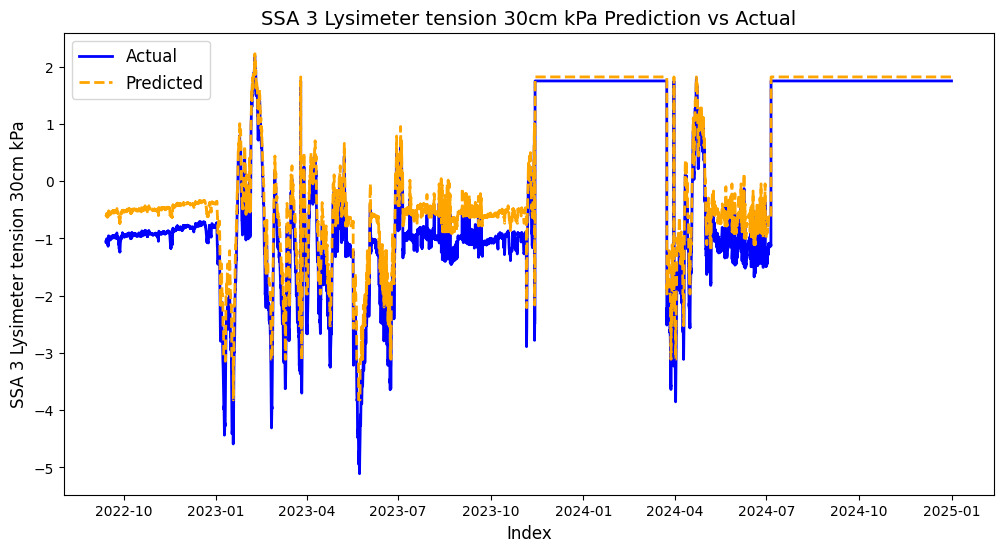

In [21]:
import matplotlib.pyplot as plt

col = 'SSA 3 Lysimeter tension 30cm kPa'

plt.figure(figsize=(12, 6))

# Plot actual values as a line
plt.plot(Y_test.index, Y_test[col], color='blue', label='Actual', linewidth=2)

# Plot predicted values as a line (directly from models)
Y_pred_col = np.array([models[col].predict(X_test) for col in [col]]).flatten()
plt.plot(Y_test.index, Y_pred_col, color='orange', linestyle='--', label='Predicted', linewidth=2)

plt.xlabel('Index', fontsize=12)
plt.ylabel(col, fontsize=12)
plt.title(f'{col} Prediction vs Actual', fontsize=14)
plt.legend(fontsize=12)

plt.show()


In [22]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
import pandas as pd
import numpy as np

# Make predictions for all columns
Y_pred = np.column_stack([models[col].predict(X_test) for col in Y_train.columns])
Y_pred_df = pd.DataFrame(Y_pred, columns=Y_test.columns, index=Y_test.index)

# Compute metrics per column
metrics = {}
for col in Y_test.columns:
    rmse = root_mean_squared_error(Y_test[col], Y_pred_df[col])  # RMSE
    mae = mean_absolute_error(Y_test[col], Y_pred_df[col])       # MAE
    r2 = r2_score(Y_test[col], Y_pred_df[col])                   # R²
    metrics[col] = {"RMSE": rmse, "MAE": mae, "R2": r2}

# Display metrics
for col, m in metrics.items():
    print(f"{col}: RMSE = {m['RMSE']:.4f}, MAE = {m['MAE']:.4f}, R² = {m['R2']:.4f}")


SSA 3 Lysimeter UMP 120cm %: RMSE = 1.9613, MAE = 1.3104, R² = 0.8480
SSA 3 Lysimeter UMP 30cm %: RMSE = 2.4284, MAE = 1.1165, R² = 0.8406
SSA 3 Lysimeter UMP 75cm %: RMSE = 0.9107, MAE = 0.6914, R² = 0.9437
SSA 3 Lysimeter battery V: RMSE = 0.0875, MAE = 0.0702, R² = 0.9139
SSA 3 Lysimeter ec 120cm mS/cm: RMSE = 0.0076, MAE = 0.0053, R² = 0.8228
SSA 3 Lysimeter ec 30cm mS/cm: RMSE = 0.0050, MAE = 0.0030, R² = 0.9242
SSA 3 Lysimeter ec 75cm mS/cm: RMSE = 0.0045, MAE = 0.0028, R² = 0.9111
SSA 3 Lysimeter scale (1) kg: RMSE = 21.4185, MAE = 12.7715, R² = 0.8507
SSA 3 Lysimeter temperature 120cm degC: RMSE = 3.1418, MAE = 0.6538, R² = 0.3179
SSA 3 Lysimeter temperature 30cm degC: RMSE = 2.9120, MAE = 0.7300, R² = 0.6666
SSA 3 Lysimeter temperature 75cm degC: RMSE = 3.1364, MAE = 0.6841, R² = 0.4723
SSA 3 Lysimeter tension 120cm kPa: RMSE = 1.7675, MAE = 0.6880, R² = 0.8768
SSA 3 Lysimeter tension 30cm kPa: RMSE = 0.4017, MAE = 0.3223, R² = 0.9363
SSA 3 Lysimeter tension 75cm kPa: RMSE = 2

In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from tqdm import tqdm

# Train one Random Forest model per target
models_random_forest = {}
for col in tqdm(Y_train.columns, desc="Training Random Forest models"):
    var = Y_train[col].var()
    if var <= 100:
        params = {'n_estimators': 100, 'max_depth': 7}
    elif var >= 100 and var < 500:
        params = {'n_estimators': 175, 'max_depth': 12}
    else:
        params = {'n_estimators': 500, 'max_depth': 25}

    model_random_forest = RandomForestRegressor(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        n_jobs=-1,
        random_state=42,
        
    )
    model_random_forest.fit(X_train, Y_train[col])
    models_random_forest[col] = model_random_forest

# Predict all targets
Y_pred = pd.DataFrame(
    {col: models_random_forest[col].predict(X_test) for col in Y_train.columns},
    index=Y_test.index
)

print("Predictions shape:", Y_pred.shape)

# Calculate RMSE for each target
rmse_scores = {col: np.sqrt(root_mean_squared_error(Y_test[col], Y_pred[col])) for col in Y_test.columns}

# Display RMSE
for col, score in rmse_scores.items():
    print(f"{col}: RMSE = {score:.4f}")


Training Random Forest models: 100%|██████████| 75/75 [1:28:44<00:00, 70.99s/it] 


Predictions shape: (20170, 75)
SSA 3 Lysimeter UMP 120cm %: RMSE = 1.4534
SSA 3 Lysimeter UMP 30cm %: RMSE = 1.5414
SSA 3 Lysimeter UMP 75cm %: RMSE = 1.1124
SSA 3 Lysimeter battery V: RMSE = 0.5631
SSA 3 Lysimeter ec 120cm mS/cm: RMSE = 0.0902
SSA 3 Lysimeter ec 30cm mS/cm: RMSE = 0.1886
SSA 3 Lysimeter ec 75cm mS/cm: RMSE = 0.0733
SSA 3 Lysimeter scale (1) kg: RMSE = 5.5157
SSA 3 Lysimeter temperature 120cm degC: RMSE = 1.3729
SSA 3 Lysimeter temperature 30cm degC: RMSE = 1.3402
SSA 3 Lysimeter temperature 75cm degC: RMSE = 1.2977
SSA 3 Lysimeter tension 120cm kPa: RMSE = 2.6684
SSA 3 Lysimeter tension 30cm kPa: RMSE = 1.1601
SSA 3 Lysimeter tension 75cm kPa: RMSE = 1.9723
SSA 3 Lysimeter vacuum 120cm kPa: RMSE = 1.8605
SSA 3 Lysimeter vacuum 30cm kPa: RMSE = 1.3447
SSA 3 Lysimeter vacuum 75cm kPa: RMSE = 2.1410
SSA 4 Schacht UMP (1) 120cm %: RMSE = 1.6498
SSA 4 Schacht UMP (1) 30cm %: RMSE = 1.8855
SSA 4 Schacht UMP (1) 75cm %: RMSE = 1.2298
SSA 4 Schacht UMP (2) 120cm %: RMSE = 1.4

In [26]:
col

'Weather Station radiation W/qm'

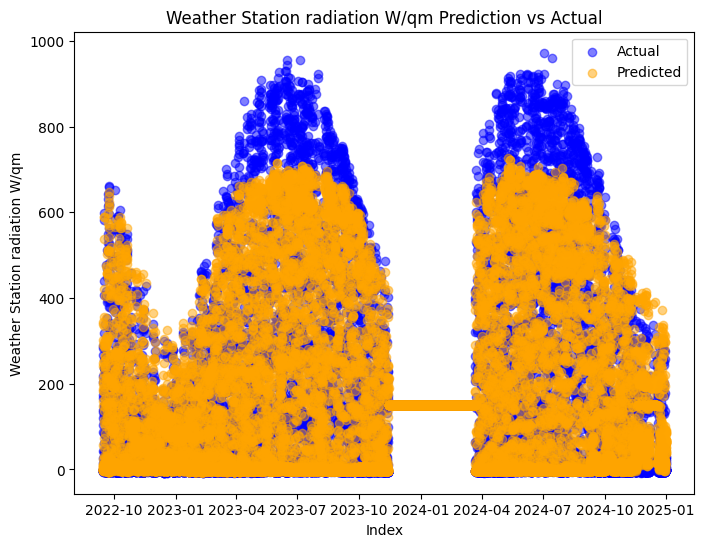

In [40]:
import matplotlib.pyplot as plt

col = 'Weather Station radiation W/qm'

plt.figure(figsize=(8,6))
plt.scatter(Y_test.index, Y_test[col], color='blue', alpha=0.5, label='Actual')
plt.scatter(Y_test.index, Y_pred[col], color='orange', alpha=0.5, label='Predicted')

plt.xlabel('Index')
plt.ylabel(col)
plt.title(f'{col} Prediction vs Actual')
plt.legend()
plt.show()


In [32]:
import os
import joblib

#Create folder if not exists
os.makedirs('../models', exist_ok=True)
os.makedirs('../models/random_forest', exist_ok=True)
# Save each model separately
for col, model in models_random_forest.items():
    filename = f"../models/random_forest/{col.replace('/', '_').replace(' ', '_')}.pkl"
    joblib.dump(model, filename)

print("All models saved successfully.")


All models saved successfully.


In [34]:
os.makedirs("../models/lightgbm", exist_ok=True)


for col, model in models.items():
    safe_name = col.replace('/', '_').replace(' ', '_').replace('(', '').replace(')', '')
    path = f"../models/lightgbm/{safe_name}.pkl"
    joblib.dump(model, path)

print("All LightGBM models saved successfully.")


All LightGBM models saved successfully.
